## INSTALLATION

In [1]:
# install the OpenJDK 11 JDK on a Debian or Ubuntu-based system in a quiet and non-interactive manner
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
# download a file from a website
# !wget -nc -q https://dlcdn.apache.org/spark/spark-3.2.4/spark-3.2.4-bin-hadoop2.tgz
!wget -nc -q https://dlcdn.apache.org/spark/spark-3.2.4/spark-3.2.4-bin-hadoop2.7.tgz
# extract the contents of a file
!tar xf spark-3.2.4-bin-hadoop2.7.tgz

In [2]:
 # API for interacting with the Spark
!pip install pyspark==3.2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.5/281.5 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 23.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.4-py2.py3-none-any.whl size=282040940 sha256=539d4eb252001acc40fbab503f42ad1ff217f32d4be0f8526bd8c4b1dc2f0791
  Stored in directory: /root/.cache/pip/wheels/e7/e3/c8/c358dac750f2b6a4b03328d10e05a5c69501664bd6504b6c3e
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


## Set Environment Variables


In [3]:
# explore files and directories of any locations in colab
!ls /content/spark-3.2.4-bin-hadoop2.7/

bin   data	jars	    LICENSE   NOTICE  R		 RELEASE  yarn
conf  examples	kubernetes  licenses  python  README.md  sbin


In [4]:
import os, sys
# set the environment variable to the locations where Spark and Java are installed.
os.environ["JAVA_HOME"] =  "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.4-bin-hadoop2.7"
# add PySpark libraries to the system path:
sys.path.append("/content/spark-3.2.4-bin-hadoop2.7/python")
sys.path.append("/content/spark-3.2.4-bin-hadoop2.7/python/lib/py4j-0.10.9.5-src.zip")

In [5]:
# import dependencies
import pyspark.sql.types as T
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from pyspark.ml.feature import Binarizer, Bucketizer, OneHotEncoder, VectorAssembler, StringIndexer, MinMaxScalerModel, \
StandardScaler, Imputer, Tokenizer,StopWordsRemover, MinMaxScaler, PolynomialExpansion
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans, KMeansModel
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, TrainValidationSplit
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator, ClusteringEvaluator, RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.mllib.evaluation import RankingMetrics
from random import randint
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np; import pandas as pd
from pyspark.sql.functions import concat, lit



In [6]:
# spark = SparkSession.builder.appName("PROJECT").getOrCreate()
spark = SparkSession.builder \
    .master('local[*]') \
    .config("spark.driver.memory", "10g") \
    .appName("PROJECT") \
    .getOrCreate()
sc = spark.sparkContext 

In [ ]:
spark

## DATA PREPARATION

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path = "/content/drive/MyDrive/Project Bigdata/DATA/"
# path = "/content/drive/MyDrive/Colab Notebooks/BigData/PROJECT/Project Bigdata/DATA/"

In [ ]:
# path = '/Project Bigdata/DATA/'

In [9]:
# online uers of retail sport merchandise company
df = spark.read.csv(path +
    "select_item.csv", 
    inferSchema=True, 
    header=True
)

df = df.withColumn('article_id', concat(lit('0'), df['article_id']))
# df.limit(10).show(truncate=False)
df.show()


+----------+------+
|article_id|labels|
+----------+------+
|0751399004|Blazer|
|0560559001|Blazer|
|0768285002|Blazer|
|0783144005|Blazer|
|0719378001|Blazer|
|0598636001|Blazer|
|0783245003|Blazer|
|0837368001|Blazer|
|0768433001|Blazer|
|0636455009|Blazer|
|0611745008|Blazer|
|0501288005|Blazer|
|0711031001|Blazer|
|0568601008|Blazer|
|0718908001|Blazer|
|0630542002|Blazer|
|0593009001|Blazer|
|0749815001|Blazer|
|0746292003|Blazer|
|0892327002|Blazer|
+----------+------+
only showing top 20 rows



In [15]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

label_stringIdx = StringIndexer(inputCol = "labels", outputCol = "label")
pipeline = Pipeline(stages=[label_stringIdx])
# Fit the pipeline to training documents.
# pipelineFit = pipeline.fit(df3)
# df4 = df3
pipelineFit = pipeline.fit(df)
df = pipelineFit.transform(df)
df.show(5)

+----------+------+-----+
|article_id|labels|label|
+----------+------+-----+
|0751399004|Blazer|  0.0|
|0560559001|Blazer|  0.0|
|0768285002|Blazer|  0.0|
|0783144005|Blazer|  0.0|
|0719378001|Blazer|  0.0|
+----------+------+-----+
only showing top 5 rows



In [ ]:
# from pyspark.ml import Pipeline
# from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

# label_stringIdx = StringIndexer(inputCol = "labels", outputCol = "label")
# pipeline = Pipeline(stages=[label_stringIdx])
# # Fit the pipeline to training documents.
# # pipelineFit = pipeline.fit(df3)
# # df4 = df3
# pipelineFit = pipeline.fit(df)
# df = pipelineFit.transform(df)
# df.show(5)

In [16]:
df.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  8.0| 1000|
|  0.0| 1000|
|  7.0| 1000|
|  1.0| 1000|
|  4.0| 1000|
| 11.0| 1000|
| 14.0| 1000|
|  3.0| 1000|
|  2.0| 1000|
| 17.0| 1000|
| 10.0| 1000|
| 13.0| 1000|
|  6.0| 1000|
|  5.0| 1000|
| 15.0| 1000|
|  9.0| 1000|
| 16.0| 1000|
| 12.0| 1000|
+-----+-----+



## AFTER MODELING

In [17]:
df.show()

+----------+------+-----+
|article_id|labels|label|
+----------+------+-----+
|0751399004|Blazer|  0.0|
|0560559001|Blazer|  0.0|
|0768285002|Blazer|  0.0|
|0783144005|Blazer|  0.0|
|0719378001|Blazer|  0.0|
|0598636001|Blazer|  0.0|
|0783245003|Blazer|  0.0|
|0837368001|Blazer|  0.0|
|0768433001|Blazer|  0.0|
|0636455009|Blazer|  0.0|
|0611745008|Blazer|  0.0|
|0501288005|Blazer|  0.0|
|0711031001|Blazer|  0.0|
|0568601008|Blazer|  0.0|
|0718908001|Blazer|  0.0|
|0630542002|Blazer|  0.0|
|0593009001|Blazer|  0.0|
|0749815001|Blazer|  0.0|
|0746292003|Blazer|  0.0|
|0892327002|Blazer|  0.0|
+----------+------+-----+
only showing top 20 rows



In [18]:
import pandas as pd
import numpy as np

In [19]:
pd.read_csv(path + "select_item.csv")

,article_id,labels
0,751399004,Blazer
1,560559001,Blazer
2,768285002,Blazer
3,783144005,Blazer
4,719378001,Blazer
...,...,...
17995,642161002,Vest top
17996,646037002,Vest top
17997,387348012,Vest top
17998,478426002,Vest top


In [20]:
df_temp = df.toPandas()
df_temp.head(5)

,article_id,labels,label
0,0751399004,Blazer,0.0
1,0560559001,Blazer,0.0
2,0768285002,Blazer,0.0
3,0783144005,Blazer,0.0
4,0719378001,Blazer,0.0


In [21]:
df_label = df_temp[['labels','label']]
df_label.head()

,labels,label
0,Blazer,0.0
1,Blazer,0.0
2,Blazer,0.0
3,Blazer,0.0
4,Blazer,0.0


In [22]:
df_label2 = df_label.drop_duplicates()
print(df_label2.info())
df_label2 = df_label2.reset_index(drop =True)
df_label2['label_num'] = df_label2['label']
df_label2['label_name'] = df_label2['labels']
df_label2=df_label2[['label_name','label_num']] 
df_label2.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   labels  18 non-null     object 
 1   label   18 non-null     float64
dtypes: float64(1), object(1)
memory usage: 432.0+ bytes
None


,label_name,label_num
0,Blazer,0.0
1,Blouse,1.0
2,Cardigan,2.0
3,Dress,3.0
4,Hoodie,4.0
5,Jacket,5.0
6,Jumpsuit/Playsuit,6.0
7,Leggings/Tights,7.0
8,Shirt,8.0
9,Shoes,9.0


In [23]:
df_lr = pd.read_parquet(path + "lr_tuned_model.parquet", engine='auto') #, columns=None, #, engine='pyarrow'
df_lr.head()

,article_id,prediction,label
0,0241602028,0.0,0.0
1,0451290006,0.0,0.0
2,0451290009,0.0,0.0
3,0451290015,0.0,0.0
4,0497358001,0.0,0.0


In [24]:
df_lr2 = df_lr.merge(df_label2, left_on='prediction', right_on='label_num')
df_lr2['prediction_num'] = df_lr2['prediction']
df_lr2['GT_num'] = df_lr2['label']

df_lr2['prediction_name'] = df_lr2['label_name']
# df_lr2['GT_name'] = df_lr2['label']
df_lr2 = df_lr2[['article_id','prediction_num','prediction_name','GT_num']]
# display(df_lr2.(10))

df_lr2 = df_lr2.merge(df_label2, left_on='GT_num', right_on='label_num')
df_lr2['GT_name'] = df_lr2['label_name']
df_lr2 = df_lr2[['article_id','prediction_num','prediction_name','GT_num','GT_name']]
# df_lr2 = 
df_lr2

,article_id,prediction_num,prediction_name,GT_num,GT_name
0,0241602028,0.0,Blazer,0.0,Blazer
1,0451290006,0.0,Blazer,0.0,Blazer
2,0451290009,0.0,Blazer,0.0,Blazer
3,0451290015,0.0,Blazer,0.0,Blazer
4,0497358001,0.0,Blazer,0.0,Blazer
...,...,...,...,...,...
2690,0898885002,9.0,Shoes,9.0,Shoes
2691,0900859001,9.0,Shoes,9.0,Shoes
2692,0911736001,9.0,Shoes,9.0,Shoes
2693,0920777003,9.0,Shoes,9.0,Shoes


[[115   2   0   0   1   3   0   0   3   0   0   0   0   1   0   0   0   0]
 [  0  74   6  12   0   2   6   0  14   0   1   7   1   4   9   0   2   5]
 [  2   2 120   1   5   6   1   0   2   0   0   1   1  17   2   0   0   1]
 [  1   9   5 100   0   4  15   0   3   0   0   6   0   4   5   0   0   3]
 [  2   3   0   0 117  13   2   0   1   0   0   0   0   7   1   0   0   1]
 [  5   4   6   2   6 104   1   0   7   0   0   1   0   2   0   2   1   0]
 [  2   5   0  32   1   3  98   1   1   0   2   0   0   2   5   2   0  11]
 [  0   0   0   0   0   0   0 120   0   0   5   0   2   1   1  27   2   0]
 [  0  11   4   1   0   6   2   0 114   0   0   2   2   0   6   0   1   1]
 [  0   0   0   0   0   0   0   0   0 137   0   0   1   0   0   0   0   0]
 [  0   1   0   1   0   0   4   2   1   0 132  12   1   0   0   4   3   0]
 [  0   2   0   0   0   0   0   1   1   0   8 134   0   1   0   0   0   2]
 [  0   0   0   0   0   0   1   2   0   3   0   0 146   0   1   0   1   1]
 [  1   1  16   1  17   2

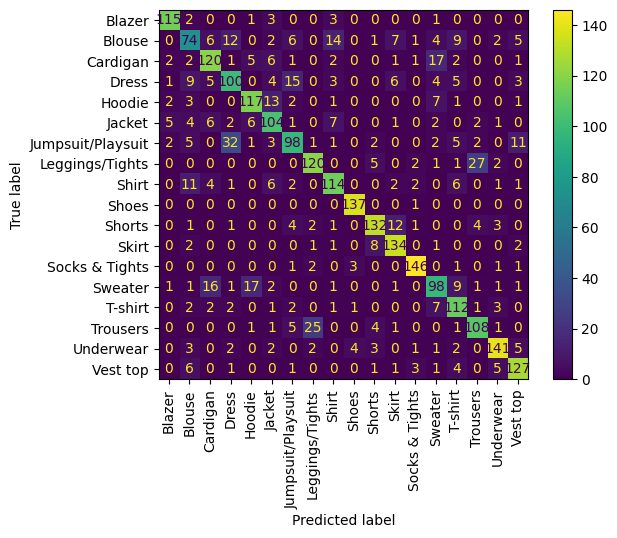

In [27]:
preds = df_lr2[['prediction_name']]
truths = df_lr2[['GT_name']]

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, classification_report

print(confusion_matrix(truths, preds))
print(classification_report(truths, preds))
print(precision_recall_fscore_support(truths, preds, average='micro'))

ConfusionMatrixDisplay.from_predictions(truths, preds, xticks_rotation='vertical')

In [ ]:
df_label2

,label_name,label_num
0,Blazer,0.0
1,Blouse,1.0
2,Cardigan,2.0
3,Dress,3.0
4,Hoodie,4.0
5,Jacket,5.0
6,Jumpsuit/Playsuit,6.0
7,Leggings/Tights,7.0
8,Shirt,8.0
9,Shoes,9.0


In [ ]:
df_viz = df_label2.copy()
df_viz['total'] = ''
df_viz['fail'] = ''
df_viz['correct'] = ''
df_viz['fail_per'] = ''
df_viz['correct_per'] = ''
for i in df_label2['label_num']:
  df_lr3 = df_lr2[df_lr2['GT_num'] == i]
  i = int(i)
  df_viz['total'].iloc[i] = len(df_lr3)
  df_viz['fail'].iloc[i] = len(df_lr3[df_lr3['prediction_num'] != df_lr3['GT_num']])
  df_viz['fail'].iloc[i] = len(df_lr3[df_lr3['prediction_num'] != df_lr3['GT_num']])
  df_viz['correct'].iloc[i] = len(df_lr3[df_lr3['prediction_num'] == df_lr3['GT_num']])
  df_viz['fail_per'].iloc[i] = (len(df_lr3[df_lr3['prediction_num'] != df_lr3['GT_num']])/len(df_lr3))*100
  df_viz['correct_per'].iloc[i] = (len(df_lr3[df_lr3['prediction_num'] == df_lr3['GT_num']])/len(df_lr3))*100

  # print('=>',df_label2['label_name'].iloc[i])
  # print('total: ',len(df_lr3))
  # print('fail: ',len(df_lr3[df_lr3['prediction_num'] != df_lr3['GT_num']]))
  # print('correct: ',len(df_lr3[df_lr3['prediction_num'] == df_lr3['GT_num']]))
  # print('fail %: ',(len(df_lr3[df_lr3['prediction_num'] != df_lr3['GT_num']])/len(df_lr3))*100,'%')
  # print('correct %: ',(len(df_lr3[df_lr3['prediction_num'] == df_lr3['GT_num']])/len(df_lr3))*100,'%')
  # print('='*50)
df_viz

<ipython-input-105-5151262cba6d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz['total'].iloc[i] = len(df_lr3)
<ipython-input-105-5151262cba6d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz['fail'].iloc[i] = len(df_lr3[df_lr3['prediction_num'] != df_lr3['GT_num']])
<ipython-input-105-5151262cba6d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz['fail'].iloc[i] = len(df_lr3[df_lr3['prediction_num'] != df_lr

,label_name,label_num,total,fail,correct,fail_per,correct_per
0,Blazer,0.0,125,10,115,8.0,92.0
1,Blouse,1.0,143,69,74,48.251748,51.748252
2,Cardigan,2.0,161,41,120,25.465839,74.534161
3,Dress,3.0,155,55,100,35.483871,64.516129
4,Hoodie,4.0,147,30,117,20.408163,79.591837
5,Jacket,5.0,141,37,104,26.241135,73.758865
6,Jumpsuit/Playsuit,6.0,165,67,98,40.606061,59.393939
7,Leggings/Tights,7.0,158,38,120,24.050633,75.949367
8,Shirt,8.0,150,36,114,24.0,76.0
9,Shoes,9.0,138,1,137,0.724638,99.275362
